## business problem understanding

the business problem is to predict the T20 world cup score which used to estimates aproximate final runs and which can show to the match viewers on screen

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
df = pickle.load(open('first inning.pkl', 'rb')) 

In [3]:
df.reset_index().drop(['index'], axis=1)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Australia,South Africa,Adelaide,96,38,6,7.024390,41.0,144
1,Bangladesh,Sri Lanka,Colombo,64,79,7,9.365854,45.0,155
2,Sri Lanka,West Indies,Pallekele,58,85,10,9.942857,48.0,215
3,Pakistan,India,Mirpur,68,33,3,4.689655,22.0,83
4,Sri Lanka,Pakistan,London,70,43,5,5.454545,26.0,138
...,...,...,...,...,...,...,...,...,...
38472,Pakistan,South Africa,Dubai,49,50,5,4.200000,27.0,98
38473,Bangladesh,Sri Lanka,Mirpur,113,22,6,6.918367,48.0,147
38474,Pakistan,South Africa,Abu Dhabi,68,43,5,5.298701,26.0,120
38475,Pakistan,India,Colombo,73,50,5,6.257143,30.0,128


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38477 entries, 42924 to 4782
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batting_team   38477 non-null  object 
 1   bowling_team   38477 non-null  object 
 2   city           38477 non-null  object 
 3   current_score  38477 non-null  int64  
 4   balls_left     38477 non-null  int64  
 5   wickets_left   38477 non-null  int32  
 6   crr            38477 non-null  float64
 7   last_five      38477 non-null  float64
 8   runs_x         38477 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 2.8+ MB


In [8]:
a = df['city'].value_counts().reset_index()
a

,index,city
0,Colombo,3129
1,Mirpur,2608
2,Johannesburg,2548
3,Dubai,2273
4,Auckland,1923
5,Cape Town,1818
6,London,1611
7,Pallekele,1573
8,Barbados,1557
9,Sydney,1202


In [9]:
a['index'].unique()

array(['Colombo', 'Mirpur', 'Johannesburg', 'Dubai', 'Auckland',
       'Cape Town', 'London', 'Pallekele', 'Barbados', 'Sydney',
       'Melbourne', 'Durban', 'St Lucia', 'Wellington', 'Lauderhill',
       'Hamilton', 'Centurion', 'Manchester', 'Abu Dhabi', 'Mumbai',
       'Nottingham', 'Southampton', 'Mount Maunganui', 'Chittagong',
       'Kolkata', 'Lahore', 'Delhi', 'Nagpur', 'Chandigarh', 'Adelaide',
       'Bangalore', 'Cardiff', 'Christchurch', 'Trinidad', 'St Kitts'],
      dtype=object)

In [10]:
a['city'].unique()

array([3129, 2608, 2548, 2273, 1923, 1818, 1611, 1573, 1557, 1202, 1197,
       1143, 1139, 1031,  948,  929,  899,  854,  838,  763,  759,  755,
        690,  665,  641,  574,  565,  561,  482,  478,  475,  470,  469,
        466,  444], dtype=int64)

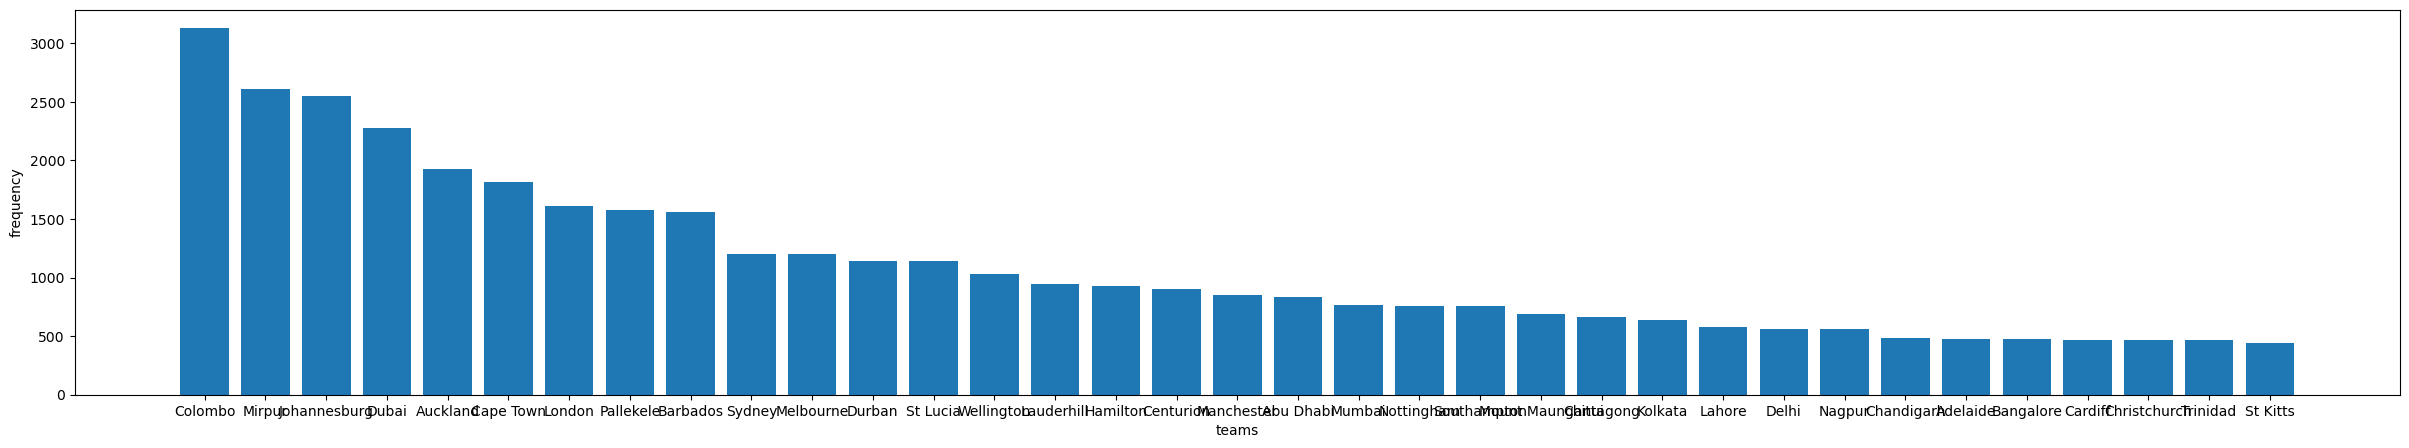

In [12]:
plt.figure(figsize=(30,5))
x= (['Colombo', 'Mirpur', 'Johannesburg', 'Dubai', 'Auckland',
       'Cape Town', 'London', 'Pallekele', 'Barbados', 'Sydney',
       'Melbourne', 'Durban', 'St Lucia', 'Wellington', 'Lauderhill',
       'Hamilton', 'Centurion', 'Manchester', 'Abu Dhabi', 'Mumbai',
       'Nottingham', 'Southampton', 'Mount Maunganui', 'Chittagong',
       'Kolkata', 'Lahore', 'Delhi', 'Nagpur', 'Chandigarh', 'Adelaide',
       'Bangalore', 'Cardiff', 'Christchurch', 'Trinidad', 'St Kitts'])     
y = ([3129, 2608, 2548, 2273, 1923, 1818, 1611, 1573, 1557, 1202, 1197,
       1143, 1139, 1031,  948,  929,  899,  854,  838,  763,  759,  755,
        690,  665,  641,  574,  565,  561,  482,  478,  475,  470,  469,
        466,  444])
plt.bar(x,y)
plt.xlabel('teams')
plt.ylabel('frequency')
plt.show()

In [15]:
b = df['bowling_team'].value_counts().reset_index()
b

,index,bowling_team
0,England,5289
1,Pakistan,5083
2,Australia,4814
3,India,4237
4,New Zealand,4101
5,South Africa,3914
6,Sri Lanka,3844
7,West Indies,3782
8,Bangladesh,2873
9,Afghanistan,540


In [16]:
b['index'].unique()

array(['England', 'Pakistan', 'Australia', 'India', 'New Zealand',
       'South Africa', 'Sri Lanka', 'West Indies', 'Bangladesh',
       'Afghanistan'], dtype=object)

In [17]:
b['bowling_team'].unique()

array([5289, 5083, 4814, 4237, 4101, 3914, 3844, 3782, 2873,  540],
      dtype=int64)

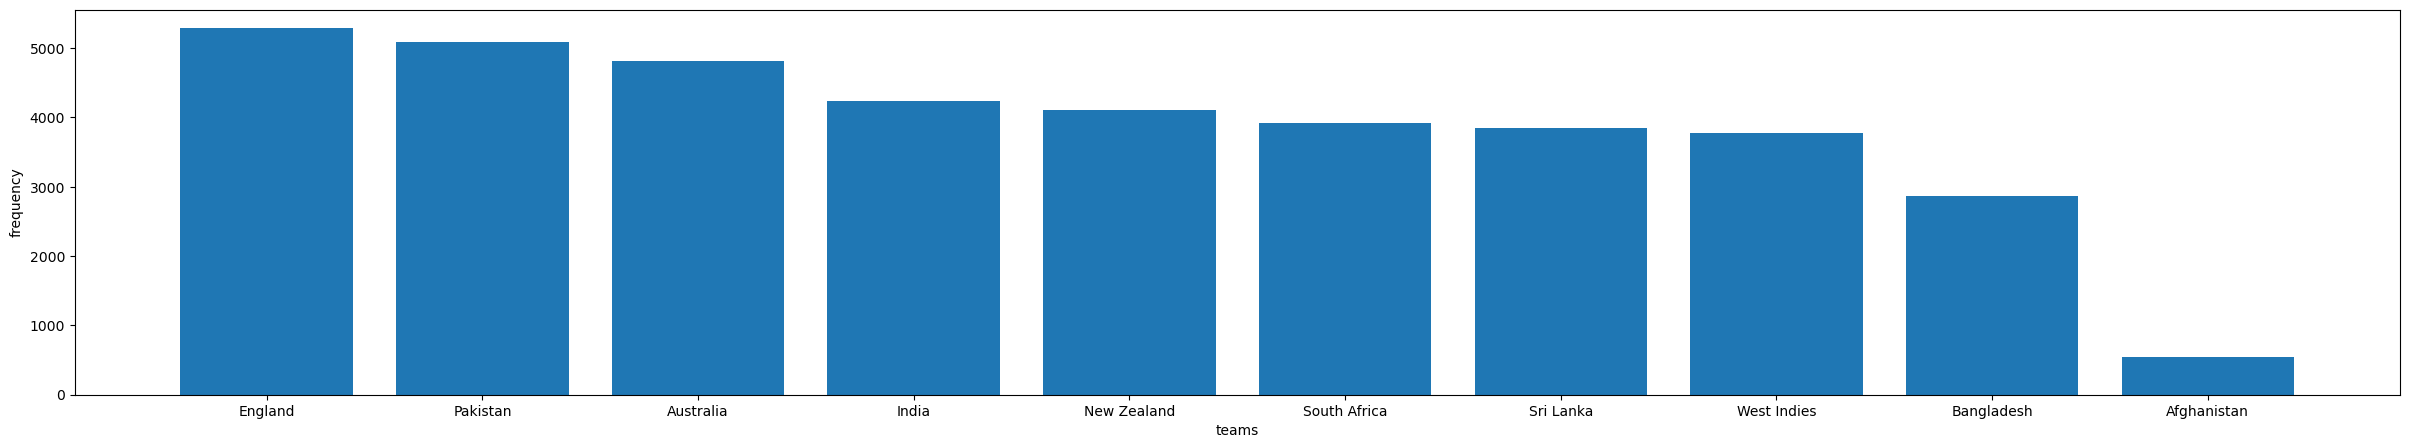

In [18]:
plt.figure(figsize=(30,5))
x= (['England', 'Pakistan', 'Australia', 'India', 'New Zealand',
       'South Africa', 'Sri Lanka', 'West Indies', 'Bangladesh',
       'Afghanistan'])
y = ([5289, 5083, 4814, 4237, 4101, 3914, 3844, 3782, 2873,  540])
plt.bar(x,y)
plt.xlabel('teams')
plt.ylabel('frequency')
plt.show()

In [20]:
c = df['batting_team'].value_counts().reset_index()
c

,index,batting_team
0,New Zealand,5510
1,Pakistan,5149
2,Sri Lanka,4757
3,South Africa,4635
4,India,4363
5,Australia,4117
6,West Indies,3851
7,England,3577
8,Bangladesh,1970
9,Afghanistan,548


In [21]:
c['index'].unique()

array(['New Zealand', 'Pakistan', 'Sri Lanka', 'South Africa', 'India',
       'Australia', 'West Indies', 'England', 'Bangladesh', 'Afghanistan'],
      dtype=object)

In [22]:
c['batting_team'].unique()

array([5510, 5149, 4757, 4635, 4363, 4117, 3851, 3577, 1970,  548],
      dtype=int64)

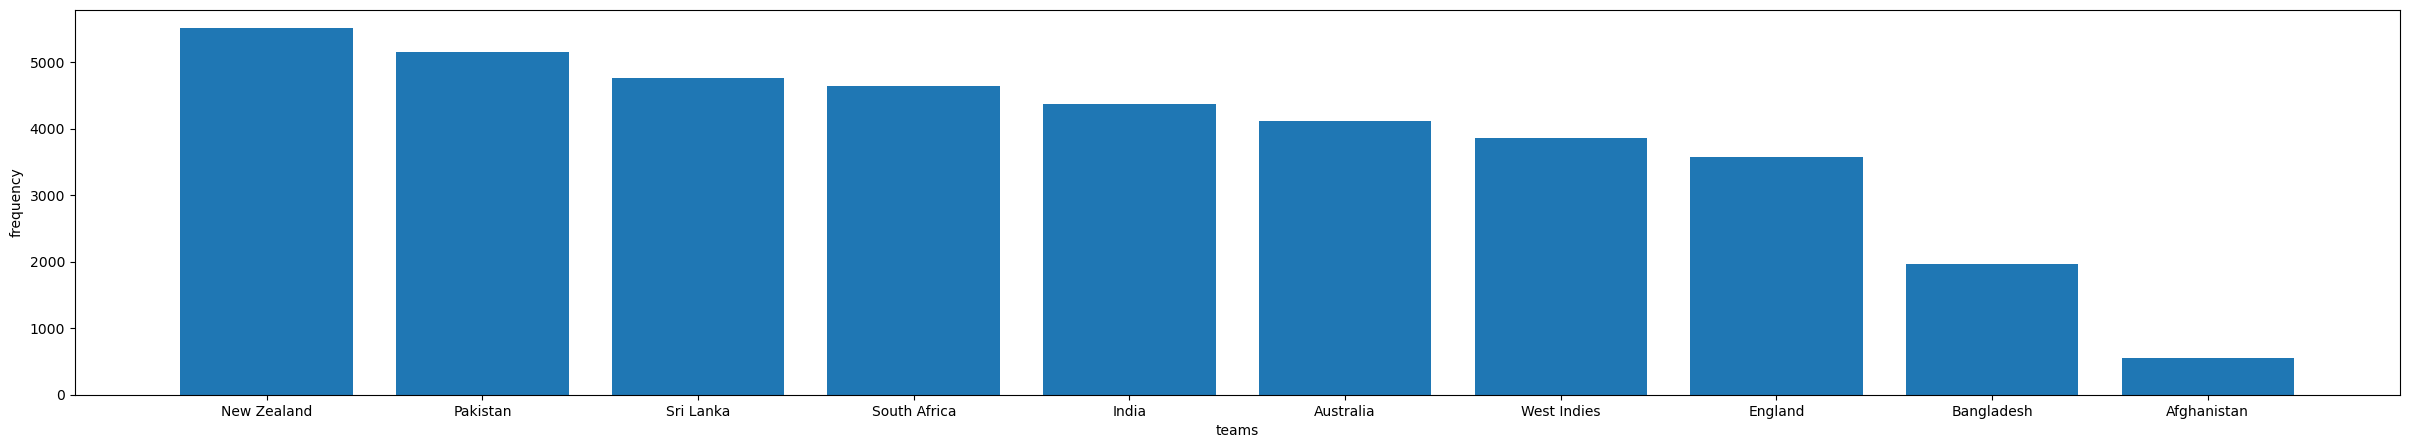

In [23]:
plt.figure(figsize=(30,5))
x= (['New Zealand', 'Pakistan', 'Sri Lanka', 'South Africa', 'India',
       'Australia', 'West Indies', 'England', 'Bangladesh', 'Afghanistan'])
y = ([5510, 5149, 4757, 4635, 4363, 4117, 3851, 3577, 1970,  548])
plt.bar(x,y)
plt.xlabel('teams')
plt.ylabel('frequency')
plt.show()

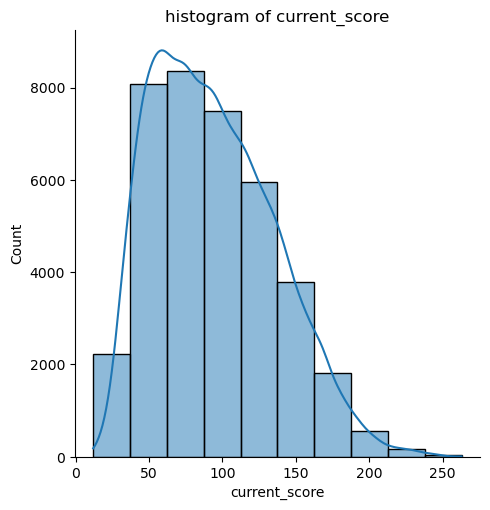

In [26]:
sns.displot(df['current_score'],bins=10,kde=True)
plt.title('histogram of current_score')
plt.show()

In [28]:
df['current_score'].skew()

0.5278916984881674

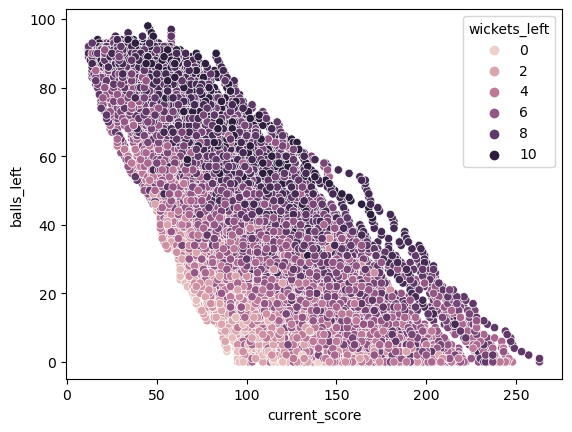

In [32]:
sns.scatterplot(x=df['current_score'], y=df['balls_left'], hue=df['wickets_left'])
plt.show()

In [27]:
df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
42924,Australia,South Africa,Adelaide,96,38,6,7.024390,41.0,144
2781,Bangladesh,Sri Lanka,Colombo,64,79,7,9.365854,45.0,155
46212,Sri Lanka,West Indies,Pallekele,58,85,10,9.942857,48.0,215
49649,Pakistan,India,Mirpur,68,33,3,4.689655,22.0,83
21949,Sri Lanka,Pakistan,London,70,43,5,5.454545,26.0,138
...,...,...,...,...,...,...,...,...,...
38038,Pakistan,South Africa,Dubai,49,50,5,4.200000,27.0,98
49769,Bangladesh,Sri Lanka,Mirpur,113,22,6,6.918367,48.0,147
28098,Pakistan,South Africa,Abu Dhabi,68,43,5,5.298701,26.0,120
33040,Pakistan,India,Colombo,73,50,5,6.257143,30.0,128


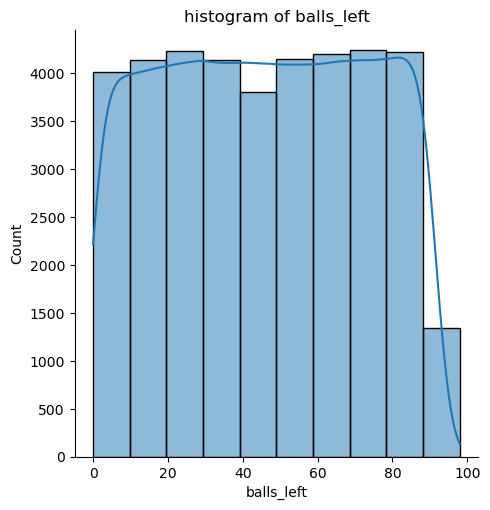

In [33]:
sns.displot(df['balls_left'],bins=10,kde=True)
plt.title('histogram of balls_left')
plt.show()

In [34]:
df['balls_left'].skew()

-0.009014566148805211

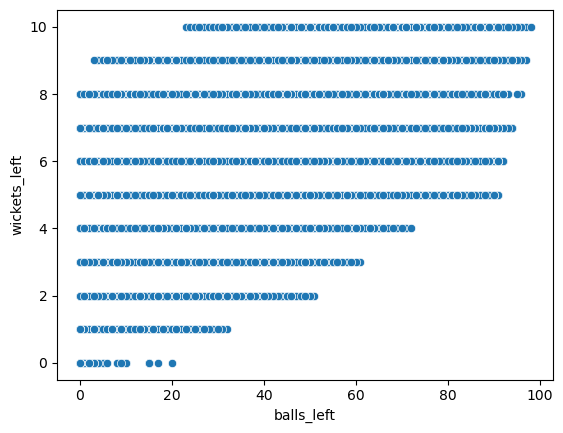

In [35]:
sns.scatterplot(x=df['balls_left'], y=df['wickets_left'])
plt.show()

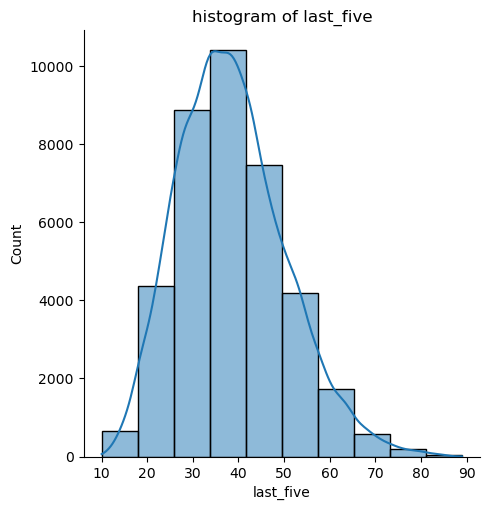

In [36]:
sns.displot(df['last_five'],bins=10,kde=True)
plt.title('histogram of last_five')
plt.show()

In [37]:
df['last_five'].skew()

0.5026866649334544

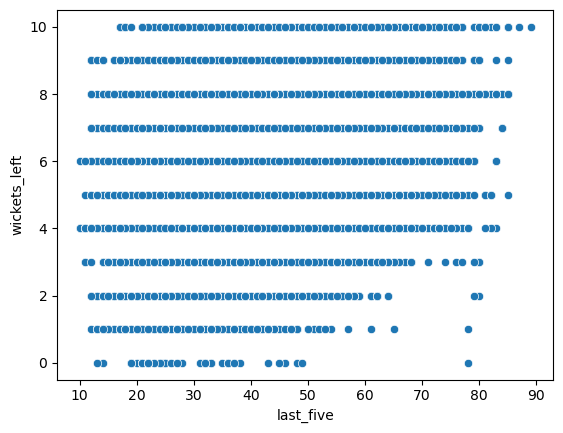

In [38]:
sns.scatterplot(x=df['last_five'], y=df['wickets_left'])
plt.show()

# Modeling

In [4]:
df = pd.get_dummies(df, drop_first=True)
df

,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,...,city_Mumbai,city_Nagpur,city_Nottingham,city_Pallekele,city_Southampton,city_St Kitts,city_St Lucia,city_Sydney,city_Trinidad,city_Wellington
42924,96,38,6,7.024390,41.0,144,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2781,64,79,7,9.365854,45.0,155,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46212,58,85,10,9.942857,48.0,215,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
49649,68,33,3,4.689655,22.0,83,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21949,70,43,5,5.454545,26.0,138,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38038,49,50,5,4.200000,27.0,98,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49769,113,22,6,6.918367,48.0,147,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28098,68,43,5,5.298701,26.0,120,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33040,73,50,5,6.257143,30.0,128,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# eq1. Polynomial regression

In [5]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_covertor = PolynomialFeatures(degree=2,include_bias=False )
#degree = 2 ie, this model aplicable for quadratic eq. ax2 + bx + c
# bias=False, for not calculating of c
x_poly = polynomial_covertor.fit_transform(x)
x_poly = pd.DataFrame(x_poly)
# x1|x2|x3|x1^2|x2^2|x3^2|x1*x2|x1*x3|x2*x3 --- this produce input variable

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [10]:
model.intercept_

13.463443887051312

In [11]:
model.coef_

array([ 0.1799293 ,  0.79389991, -1.22226361, ..., 14.45744603,
        0.        , -4.43422482])

In [12]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [13]:
print('R2_TRAIN :',model.score(x_train,y_train)) #TRAIN_score
print('R2_TEST :',model.score(x_test,y_test))  #TEST_score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_poly, y, cv=5)
print(scores)
print('ACCURECY :',scores.mean())



R2_TRAIN : 0.9377360609803429
R2_TEST : 0.9326163706259858
[0.93720993 0.93356654 0.93405503 0.93556622 0.93299974]
ACCURECY : 0.9346794928747842


# 2.lasso regression

In [14]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

from sklearn.linear_model import Lasso  #import
lasso_model = Lasso()            # save as a model name
lasso_model.fit(x_train , y_train)  #fit on train data

# prediction
train_pred = lasso_model.predict(x_train)   
test_pred = lasso_model.predict(x_test)

#evalution
print(lasso_model.score(x_train , y_train))  #train score
print(lasso_model.score(x_test , y_test)) #test score

#accurecy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso_model,x, y, cv=5)
print(scores)
scores.mean()

0.6511016286659982
0.6513492209113105
[0.65804131 0.64724601 0.64592351 0.65413387 0.64880456]


0.6508298550043428

# 3. lasso regression with hyperparameter

In [15]:
from sklearn.model_selection import GridSearchCV  # import

estimator = Lasso()

param_grid = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
# we can take range also

In [16]:
model_hp = GridSearchCV(estimator , param_grid, cv=5) # save the model name

model_hp.fit(x_train , y_train)   # fit the model on train data

model_hp.best_params_

{'alpha': 0.1}

In [17]:
from sklearn.linear_model import Lasso  #import
model_hp = Lasso(alpha=0.1)            # save as a model name
model_hp.fit(x_train , y_train)  #fit on train data

# prediction

train_pred = model_hp.predict(x_train)
test_pred = model_hp.predict(x_test)

# evalution

print('R2_TRAIN :',model_hp.score(x_train , y_train))  # R2 - train
print('R2_TEST :',model_hp.score(x_test , y_test))  # R2 - train

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_hp,x, y, cv=5)
print(scores)
print('ACCURECY :',scores.mean())

R2_TRAIN : 0.6778837308688854
R2_TEST : 0.6759218374182041
[0.68509027 0.67253274 0.67282193 0.68100188 0.67370968]
ACCURECY : 0.6770312973696627


# 4. ridge model

In [18]:
from sklearn.linear_model import Ridge  #import
ridge_model = Ridge()            # save as a model name
ridge_model.fit(x_train , y_train)  #fit on train data

# prediction

train_pred = ridge_model.predict(x_train)
test_pred = ridge_model.predict(x_test)

# evalution

print('R2_TRAIN :',ridge_model.score(x_train , y_train))  # R2 - train
print('R2_TEST :',ridge_model.score(x_train , y_train))  # R2 - train

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge_model,x, y, cv=5)
print(scores)
print('ACCURECY :',scores.mean())

R2_TRAIN : 0.6961319549282452
R2_TEST : 0.6961319549282452
[0.70303213 0.6877155  0.69460916 0.6998777  0.68881825]
ACCURECY : 0.6948105467660175


# 5. ridge model with hyperparameter

In [19]:
from sklearn.model_selection import GridSearchCV  # import

estimator = Ridge()

param_grid = {'alpha':list(range(1,11))}

In [20]:
model_hp = GridSearchCV(estimator , param_grid, cv=5) # save the model name

model_hp.fit(x_train , y_train)   # fit the model on train data

model_hp.best_params_

{'alpha': 1}

In [21]:
from sklearn.linear_model import Ridge  #import
ridge_model = Ridge(alpha=1)            # save as a model name
ridge_model.fit(x_train , y_train)  #fit on train data

# prediction

train_pred = ridge_model.predict(x_train)
test_pred = ridge_model.predict(x_test)

# evalution

print('R2_TRAIN :',ridge_model.score(x_train , y_train))  # R2 - train
print('R2_TEST :',ridge_model.score(x_train , y_train))  # R2 - train

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge_model,x, y, cv=5)
print(scores)
print('ACCURECY :',scores.mean())

R2_TRAIN : 0.6961319549282452
R2_TEST : 0.6961319549282452
[0.70303213 0.6877155  0.69460916 0.6998777  0.68881825]
ACCURECY : 0.6948105467660175


# 6. knn model

In [22]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# scaling the data (compulsory for this model its only done on input not output)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # only transform not fit

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

# prediction

ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)

# Evalution ie, score
print('train_score',knn_model.score(x_train, y_train))
print('test_score', knn_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.997448247218128
test_score 0.9951668012608401
[0.77126297 0.77155018 0.77743167 0.77981887 0.77170875]
ACCURECY : 0.7743544872756313


# 7. knn with hyperparameter 

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsRegressor()

param_grid = {'n_neighbors' : list(range(1,31)), 'p':[1,2]} #n_neighbors = K value

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

full_cv_classifier.fit(x_train, y_train)

full_cv_classifier.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=20,p=2)
knn_model.fit(x_train, y_train)

# prediction

ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)

# Evalution ie, R2

print('train_score',knn_model.score(x_train, y_train))
print('test_score', knn_model.score(x_test, y_test))

score = cross_val_score(knn_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

# 8. Decision Tree Model

In [24]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

# prediction

ypred_train = tree_model.predict(x_train)
ypred_test = tree_model.predict(x_test)

# Evalution ie, R2

print('train_score',tree_model.score(x_train, y_train))
print('test_score', tree_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.9999137250737097
test_score 0.9461782305006002
[0.95775659 0.94025964 0.94548447 0.94912142 0.95017498]
ACCURECY : 0.9485594197151869


# 9. Random Forest

In [44]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# modelling

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(x_train, y_train)

# prediction

ypred_train = random_forest.predict(x_train)
ypred_test =random_forest.predict(x_test)

# Evalution ie, R2

print('train_score',random_forest.score(x_train, y_train))
print('test_score',random_forest.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(random_forest, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.9967280157230484
test_score 0.9778961333087006
[0.98025662 0.97636704 0.9787887  0.98009961 0.97855348]
ACCURECY : 0.9788130910870464


# 10. Random Forest with hyperparameter

In [26]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {'n_estimators': list(range(1,10))}

grid = GridSearchCV(estimator,param_grid, scoring = 'accuracy',cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

D:\DSP-DS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'n_estimators': 1}

In [27]:
from sklearn.ensemble import RandomForestRegressor
tree_model = RandomForestRegressor(n_estimators=1, random_state=1)
tree_model.fit(x_train, y_train)

# prediction

ypred_train = tree_model.predict(x_train)
ypred_test = tree_model.predict(x_test)

# Evalution ie, R2

print('train_score',tree_model.score(x_train, y_train))
print('test_score', tree_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.9622641870149324
test_score 0.9100713630532665
[0.91081664 0.89649115 0.90479979 0.90761328 0.87961139]
ACCURECY : 0.8998664491091974


# 11. adaboost model

In [28]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor() # here n_estimator defoult 50
model.fit(x_train, y_train)

# prediction

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Evalution ie, R2

print('train_score',model.score(x_train, y_train))
print('test_score', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.599536467105037
test_score 0.5963608773407739
[0.58715382 0.59816034 0.57038923 0.58803854 0.58973157]
ACCURECY : 0.5866947013850342


# 12. Gradient Boost Model

In [29]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor() # here n_estimator defoult 50
gb_model.fit(x_train, y_train)

# prediction

ypred_train = gb_model.predict(x_train)
ypred_test = gb_model.predict(x_test)

# Evalution ie, R2
print('train_score',gb_model.score(x_train, y_train))
print('test_score', gb_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(gb_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.7591385564334352
test_score 0.7485753148025583
[0.75249196 0.7540535  0.75185084 0.75264915 0.74685992]
ACCURECY : 0.7515810746870806


# 13. Gradient Boost with Hyperparameter

In [30]:
from sklearn.model_selection import GridSearchCV

estimator = GradientBoostingRegressor()

param_grid = {'n_estimators': [1,5,10,20],
              'learning_rate':[0.1,0.2,0.3]}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)

grid.fit(x_train, y_train)

grid.best_params_

D:\DSP-DS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'learning_rate': 0.1, 'n_estimators': 1}

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=1  ,learning_rate=0.1) # here n_estimator defoult 50
gb_model.fit(x_train, y_train)

# prediction

ypred_train = gb_model.predict(x_train)
ypred_test = gb_model.predict(x_test)

# Evalution ie, R2
print('train_score',gb_model.score(x_train, y_train))
print('test_score', gb_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(gb_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.11063053270976997
test_score 0.10952371774333991
[0.11035021 0.11056807 0.11010799 0.11146951 0.10864516]
ACCURECY : 0.11022818886088732


# 14. XG Boost Model

In [32]:
! pip install xgboost

In [33]:
x = df.drop(['runs_x'], axis=1)
y = df['runs_x']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

from xgboost import XGBRegressor
xgb_model = XGBRegressor() # here n_estimator defoult 50
xgb_model.fit(x_train, y_train)

# prediction

ypred_train = xgb_model.predict(x_train)
ypred_test = xgb_model.predict(x_test)

# Evalution ie, R2

print('train_score',xgb_model.score(x_train, y_train))
print('test_score', xgb_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.9636552572350728
test_score 0.9541400240969647
[0.95381371 0.95332316 0.95224957 0.95505386 0.95287474]
ACCURECY : 0.9534630093614431


# 14. XG Boost Model with hyperparameter

In [34]:
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor()

param_grid = {'n_estimators': [60,70,80,90,100],
              'max_depth':[1,2,3],
              'gamma':[0.07,0.08]
             } # learning rate = step size towords minima

grid = GridSearchCV(estimator, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)

grid.fit(x_train, y_train)

grid.best_params_

D:\DSP-DS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'gamma': 0.07, 'max_depth': 1, 'n_estimators': 60}

In [35]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(gamma=0.07, max_depth=1, n_estimators=60) # here n_estimator defoult 50
xgb_model.fit(x_train, y_train)

# prediction

ypred_train = xgb_model.predict(x_train)
ypred_test = xgb_model.predict(x_test)

# Evalution ie, R2

print('train_score',xgb_model.score(x_train, y_train))
print('test_score', xgb_model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_model, x,y,cv=5)
print(score)
print('ACCURECY :', score.mean())

train_score 0.6521925731185725
test_score 0.6482510120451808
[0.65901472 0.64414325 0.64901412 0.65778951 0.64271888]
ACCURECY : 0.6505360979301211


# NOTE
# BEST MODEL IS RANDOM FOREST WITH ACCURECY OF 97.88%

In [46]:
# save the model 

from joblib import dump
dump(random_forest, 't20_score_prediction.joblib')

['t20_score_prediction.joblib']

In [47]:
# load model
from joblib import load
loaded_model = load( 't20_score_prediction.joblib')